In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=d_sigmoid, rfn=None))

In [4]:
# optimizer
opt = 'sgd'

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = opt, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 300
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

itr 0
Iteration 0/300: 	2.505791779990508
itr 1
Iteration 1/300: 	2.481322671765479
itr 2
Iteration 2/300: 	2.4569762042749708
itr 3
Iteration 3/300: 	2.432755229629089
itr 4
Iteration 4/300: 	2.4086617443049065
itr 5
Iteration 5/300: 	2.384699028229045
itr 6
Iteration 6/300: 	2.360869933511609
itr 7
Iteration 7/300: 	2.3371768844461887
itr 8
Iteration 8/300: 	2.3136233035649094
itr 9
Iteration 9/300: 	2.2902119003723715
itr 10
Iteration 10/300: 	2.26694552697868
itr 11
Iteration 11/300: 	2.243827463310456
itr 12
Iteration 12/300: 	2.220860561477804
itr 13
Iteration 13/300: 	2.198047388379819
itr 14
Iteration 14/300: 	2.1753913665486273
itr 15
Iteration 15/300: 	2.1528953480943342
itr 16
Iteration 16/300: 	2.130562185127044
itr 17
Iteration 17/300: 	2.108395014967874
itr 18
Iteration 18/300: 	2.086396974937938
itr 19
Iteration 19/300: 	2.064570774541837
itr 20
Iteration 20/300: 	2.0429191232841704
itr 21
Iteration 21/300: 	2.021445443697065
itr 22
Iteration 22/300: 	2.00015244528512
it

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[2.505791779990508, 2.481322671765479, 2.4569762042749708, 2.432755229629089, 2.4086617443049065, 2.384699028229045, 2.360869933511609, 2.3371768844461887, 2.3136233035649094, 2.2902119003723715, 2.26694552697868, 2.243827463310456, 2.220860561477804, 2.198047388379819, 2.1753913665486273, 2.1528953480943342, 2.130562185127044, 2.108395014967874, 2.086396974937938, 2.064570774541837, 2.0429191232841704, 2.021445443697065, 2.00015244528512, 1.97904269494743, 1.9581197578216267, 1.9373859155957944, 1.9168440203800379, 1.8964969242844627, 1.8763470516026577, 1.8563973970502337, 1.836649957104264, 1.8171077264803592, 1.7977734146831192, 1.7786484477675963, 1.759735677843896, 1.7410373866001023, 1.722555285302278, 1.7042915130330023, 1.686248208874854, 1.668427084093896, 1.6508297073506863, 1.6334575047002775, 1.6163123300142377, 1.5993956093476198, 1.5827079131224444, 1.5662510952102804, 1.5500257260331483, 1.5340325186185748, 1.5182726138106017, 1.5027462968202394, 1.4874542806750146, 1.4

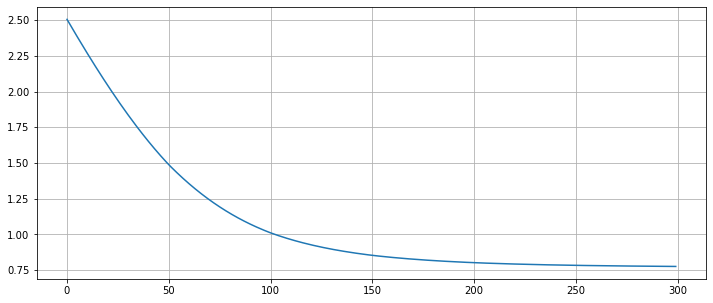

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.7511338 ]
 [0.21468751]
 [0.03417864]]
[0. 1. 0.] <-> [[0.43567583]
 [0.2720528 ]
 [0.29227135]]
[0. 1. 0.] <-> [[0.6481856 ]
 [0.22993974]
 [0.12187465]]
[0. 0. 1.] <-> [[0.3399919 ]
 [0.2879969 ]
 [0.37201118]]
[1. 0. 0.] <-> [[0.6957678 ]
 [0.22056781]
 [0.0836644 ]]
[1. 0. 0.] <-> [[0.72172165]
 [0.21459965]
 [0.06367876]]
[1. 0. 0.] <-> [[0.56475264]
 [0.24482106]
 [0.19042635]]
[1. 0. 0.] <-> [[0.73382425]
 [0.21185037]
 [0.05432534]]
[0. 1. 0.] <-> [[0.5785813 ]
 [0.24197592]
 [0.17944282]]
[1. 0. 0.] <-> [[0.68471926]
 [0.22294375]
 [0.09233703]]
[1. 0. 0.] <-> [[0.6323077 ]
 [0.23262414]
 [0.13506821]]
[1. 0. 0.] <-> [[0.68015087]
 [0.22389042]
 [0.09595871]]
[1. 0. 0.] <-> [[0.5072831]
 [0.2583852]
 [0.2343317]]
[0. 0. 1.] <-> [[0.32669097]
 [0.28460875]
 [0.3887003 ]]
[0. 1. 0.] <-> [[0.622005  ]
 [0.23430718]
 [0.14368786]]
[0. 0. 1.] <-> [[0.65443975]
 [0.22883138]
 [0.11672891]]
[0. 1. 0.] <-> [[0.541295  ]
 [0.25008157]
 [0.20862338]]
[1. 0. 0.] <-> [[